# Building a Neural Network from Scratch 

Credit: the contents of this projects are heavily inspired from this video. It served as a tutorial for guidance (https://www.youtube.com/watch?v=w8yWXqWQYmU). Based on the activation functions for the hidden and output layer, the initial parameters were calculated in a different way, which also increased accuracy.

Task: identify hand-drawn digits. 
Approach: build a neural network and train it on the MNIST-Dataset (large dataset of 10.000+ hand-drawn digits, 28x28 pixel resolution)

## Тhe data

 

$\textbf{Context}$

MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)

$\textbf{Content}$

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("/Users/davitaghajanyan/Desktop/Projects/NN from Scratch/digit-recognizer/train.csv")
print(len(data))

42000


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

X_train = X_train / 255.0
X_dev   = X_dev   / 255.0
Y_train = Y_train.astype(np.int64)
Y_dev   = Y_dev.astype(np.int64)


In [5]:
X_dev

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 1000))

In [6]:
n_x = 784
n_h = 10
n_y = 10

def init_params():
    # He for ReLU hidden layer
    W1 = np.random.randn(n_h, n_x) * np.sqrt(2.0 / n_x)
    b1 = np.full((n_h, 1), 0.0)  # try 0.0 or small 0.01 if you like

    # Glorot/Xavier for softmax output layer
    W2 = np.random.randn(n_y, n_h) * np.sqrt(2.0 / (n_h + n_y))
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

init_params()

(array([[-0.07745138,  0.03595552,  0.03260084, ...,  0.00156592,
          0.04404694,  0.06220814],
        [ 0.06956855, -0.05465991,  0.01982198, ...,  0.02572163,
          0.01259972, -0.14284821],
        [ 0.04673668, -0.00596875, -0.0311279 , ...,  0.00757913,
          0.06907589,  0.02890179],
        ...,
        [-0.00413249, -0.03181036,  0.03432573, ..., -0.02022306,
         -0.04995431, -0.02759928],
        [-0.01807008,  0.11229307, -0.00814879, ...,  0.01378474,
         -0.09924586, -0.08430028],
        [-0.01406449,  0.07512268,  0.00233494, ...,  0.01703538,
         -0.0592046 , -0.04035352]], shape=(10, 784)),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[-5.94669035e-01,  2.26679454e-01, -3.65209686e-01,
         -3.90461089e-02,  1.44117836e-02, -1.47721208e-01,
          1.44926752e-02, -4.22216019e-01, -2.92192894e-01,
          3.51365974e-01],
       

In [7]:
def forward_prop(W1, b1, W2, b2, X):
    A0 = X                  # n x m
    Z1 = W1.dot(A0) + b1    # 10 x m
    A1 = ReLU(Z1)           # 10 x m
    Z2 = W2.dot(A1) + b2    # 10 x m
    A2 = softmax(Z2)        # 10 x m
    return Z1, A1, Z2, A2

def ReLU(Z):
    return np.maximum(Z, 0) # 10 x m

def deriv_ReLU(Z):
    return np.where(Z > 0, 1, 0)

def softmax(Z):
    Z_stable = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y # 10 x m (for each elemenent in m one at the label pos)

def backward_prop(Z1, A1, Z2, A2, W2, Y, X):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(alpha, W1, dW1, b1, db1, W2, dW2, b2, db2):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, Y, X)
        W1, b1, W2, b2 = update_params(alpha, W1, dW1, b1, db1, W2, dW2, b2, db2)
        if i % 50 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.05)


Iteration: 0
Accuracy: 0.08809756097560975
Iteration: 50
Accuracy: 0.4496829268292683
Iteration: 100
Accuracy: 0.561609756097561
Iteration: 150
Accuracy: 0.6956341463414634
Iteration: 200
Accuracy: 0.7880731707317074
Iteration: 250
Accuracy: 0.824
Iteration: 300
Accuracy: 0.8453414634146341
Iteration: 350
Accuracy: 0.858609756097561
Iteration: 400
Accuracy: 0.8679024390243902
Iteration: 450
Accuracy: 0.8740243902439024
Iteration: 500
Accuracy: 0.8798536585365854
Iteration: 550
Accuracy: 0.8841463414634146
Iteration: 600
Accuracy: 0.8877317073170732
Iteration: 650
Accuracy: 0.8908048780487805
Iteration: 700
Accuracy: 0.8926341463414634
Iteration: 750
Accuracy: 0.8953658536585366
Iteration: 800
Accuracy: 0.8969268292682927
Iteration: 850
Accuracy: 0.898219512195122
Iteration: 900
Accuracy: 0.8994878048780488
Iteration: 950
Accuracy: 0.9010487804878049


## Testing

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("NN Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

NN Prediction:  9
Label:  9


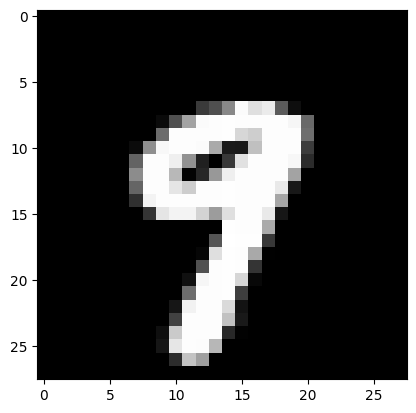

In [88]:
import random 

pred = random.randint(0, 1000 - 1)
test_prediction(pred, W1, b1, W2, b2)